In [46]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from pandas import to_numeric
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# dowload dataset
def load_data(path):
    return read_csv(path)

In [5]:
path = "/home/mafouz/Demand_forecasting_project/Historical Product Demand.csv"
series = load_data(path).sort_values('Date').reset_index(drop=True)
# show the first lines
series.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,Whse_A,Category_006,2011/1/8,2
1,Product_0412,Whse_S,Category_007,2011/10/20,(2)
2,Product_0125,Whse_S,Category_011,2011/10/20,(2)
3,Product_0642,Whse_C,Category_019,2011/10/31,3
4,Product_2137,Whse_S,Category_009,2011/11/18,(25)


In [6]:
# info
print(series.info())
# category distribution
series.groupby("Product_Category").size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB
None


Product_Category
Category_001     97787
Category_002        77
Category_003      4189
Category_004       329
Category_005    101671
Category_006     35577
Category_007     82402
Category_008      1560
Category_009     19738
Category_010       976
Category_011     23208
Category_012      1147
Category_013      3743
Category_014        26
Category_015     22954
Category_016        37
Category_017       615
Category_018      5239
Category_019    481099
Category_020      3490
Category_021     52011
Category_022      8657
Category_023      7899
Category_024     20885
Category_025        35
Category_026     14803
Category_027        26
Category_028     31302
Category_029       671
Category_030     12997
Category_031      2280
Category_032      9296
Category_033      1849
dtype: int64

In [7]:
# convert date in type datetime
series['Date'] = to_datetime(series['Date'])
# convert order_demand in numeric type
series['Order_Demand'] = series['Order_Demand'].str.replace('(',"")
series['Order_Demand'] = series['Order_Demand'].str.replace(')',"")
series['Order_Demand'] = series['Order_Demand'].astype('int64')

In [8]:
# description
print(series.describe())

       Order_Demand
count  1.048575e+06
mean   4.906977e+03
std    2.892678e+04
min    0.000000e+00
25%    2.000000e+01
50%    3.000000e+02
75%    2.000000e+03
max    4.000000e+06


In [9]:
# let's drop the null values if there are less than 2%.
# check null values in the series
print(series.isnull().any().sum())
# check the percentage of those null values
null_values = series.isnull().sum()[3] / series.shape[0] * 100
print(null_values)

if (null_values <=2):
    series.dropna(inplace = True)

print(series.notnull().sum())

1
1.0718355863910547
Product_Code        1037336
Warehouse           1037336
Product_Category    1037336
Date                1037336
Order_Demand        1037336
dtype: int64


In [10]:
# resampling to daily frequency
series_day = series.set_index('Date').resample('D').sum()
# resampling to monthly frequency
series_month = series.set_index('Date').resample('M').sum()
# resampling to quaterly frequency
series_quarterly = series.set_index('Date').resample('Q-DEC').sum()
# resampling to annual frequency
series_yearly = series.set_index('Date').resample('A-DEC').sum()

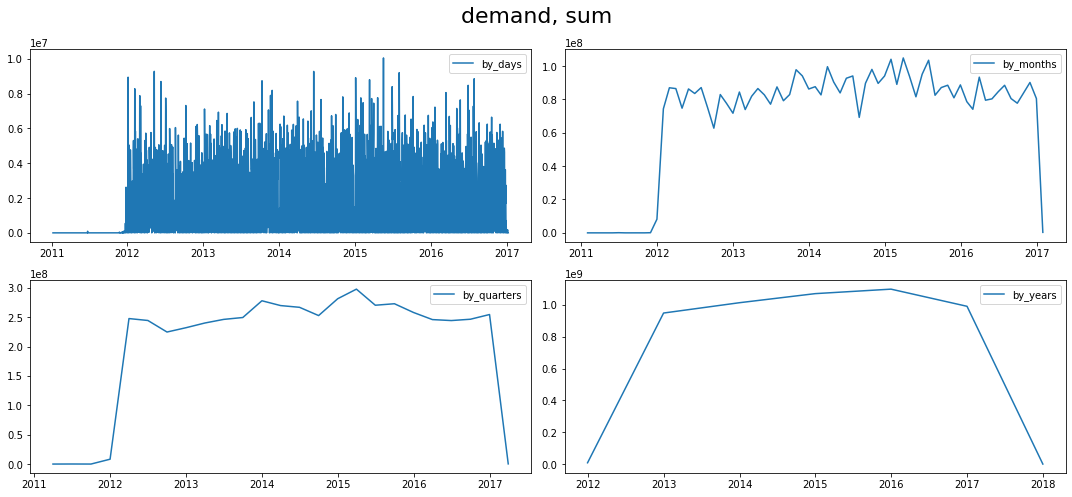

In [11]:
# using matplotlib for plotting
fig = plt.figure(figsize = [15, 7])
plt.suptitle('demand, sum', fontsize = 22)
plt.subplot(221)
plt.plot(series_day.Order_Demand, '-', label = 'by_days')
plt.legend()

plt.subplot(222)
plt.plot(series_month.Order_Demand, '-', label = 'by_months')
plt.legend()

plt.subplot(223)
plt.plot(series_quarterly.Order_Demand, '-', label = 'by_quarters')
plt.legend()

plt.subplot(224)
plt.plot(series_yearly.Order_Demand, '-', label = 'by_years')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# let's split our series using the Walk Forward Validation method into dataset and test
X = series.values
n_dataset = 10000
n_records = len(X)
for i in range(n_dataset, n_records):
    dataset, test = X[0:i], X[i:i+1]
    print('dataset = %d, test = %d' % (len(dataset), len(test)))

est = 1
dataset = 1036622, test = 1
dataset = 1036623, test = 1
dataset = 1036624, test = 1
dataset = 1036625, test = 1
dataset = 1036626, test = 1
dataset = 1036627, test = 1
dataset = 1036628, test = 1
dataset = 1036629, test = 1
dataset = 1036630, test = 1
dataset = 1036631, test = 1
dataset = 1036632, test = 1
dataset = 1036633, test = 1
dataset = 1036634, test = 1
dataset = 1036635, test = 1
dataset = 1036636, test = 1
dataset = 1036637, test = 1
dataset = 1036638, test = 1
dataset = 1036639, test = 1
dataset = 1036640, test = 1
dataset = 1036641, test = 1
dataset = 1036642, test = 1
dataset = 1036643, test = 1
dataset = 1036644, test = 1
dataset = 1036645, test = 1
dataset = 1036646, test = 1
dataset = 1036647, test = 1
dataset = 1036648, test = 1
dataset = 1036649, test = 1
dataset = 1036650, test = 1
dataset = 1036651, test = 1
dataset = 1036652, test = 1
dataset = 1036653, test = 1
dataset = 1036654, test = 1
dataset = 1036655, test = 1
dataset = 1036656, test = 1
dataset = 10

In [13]:
dataset = pd.DataFrame(dataset, columns = ['Product_Code', 'Warehouse', 'Product_Category', 'Date','Order_Demand'] )
test = pd.DataFrame(test, columns = ['Product_Code', 'Warehouse', 'Product_Category', 'Date','Order_Demand'] )

In [14]:
print('dataset_for_modeling:' + str(dataset.shape), 'data_for_testing:' + str(test.shape))
dataset.to_csv("/home/mafouz/Demand_forecasting_project/dataset.csv", index = False)
test.to_csv("/home/mafouz/Demand_forecasting_project/test.csv", index = False)

dataset_for_modeling:(1037335, 5) data_for_testing:(1, 5)


In [15]:
# dowload datasets
dataset = load_data("/home/mafouz/Demand_forecasting_project/dataset.csv").sort_values('Date').reset_index(drop = True)
print(dataset.head(5))

   Product_Code Warehouse Product_Category        Date  Order_Demand
0  Product_0965    Whse_A     Category_006  2011-01-08             2
1  Product_1724    Whse_A     Category_003  2011-05-31           108
2  Product_1521    Whse_S     Category_019  2011-06-24          7000
3  Product_1521    Whse_S     Category_019  2011-06-24         85000
4  Product_1507    Whse_C     Category_019  2011-09-02          1250


In [16]:
dataset['Date'] = to_datetime(dataset['Date'])

In [17]:
# check the duration of the data
number_of_days = dataset.Date.max() - dataset.Date.min()
number_of_years = number_of_days.days / 365
print(min(dataset.Date), max(dataset.Date))
print(number_of_days.days, 'days', number_of_years, 'years')

2011-01-08 00:00:00 2017-01-09 00:00:00
2193 days 6.008219178082192 years


#### let's split the data into train and dev sets
as our data are time dependent, we can not split it randomnly. Instead we will use Walk Forward Validation to split the data into train and dev.

In [18]:
# Let's split the data using a walk forward validation
X = dataset.values
n_train = 10000
n_records = len(X)

for i in range(n_train, n_records):
    train, dev = X[0:i], X[i:i+1]
    print('train = %d, dev = %d' % (len(train), len(dev)))

train = 1036535, dev = 1
train = 1036536, dev = 1
train = 1036537, dev = 1
train = 1036538, dev = 1
train = 1036539, dev = 1
train = 1036540, dev = 1
train = 1036541, dev = 1
train = 1036542, dev = 1
train = 1036543, dev = 1
train = 1036544, dev = 1
train = 1036545, dev = 1
train = 1036546, dev = 1
train = 1036547, dev = 1
train = 1036548, dev = 1
train = 1036549, dev = 1
train = 1036550, dev = 1
train = 1036551, dev = 1
train = 1036552, dev = 1
train = 1036553, dev = 1
train = 1036554, dev = 1
train = 1036555, dev = 1
train = 1036556, dev = 1
train = 1036557, dev = 1
train = 1036558, dev = 1
train = 1036559, dev = 1
train = 1036560, dev = 1
train = 1036561, dev = 1
train = 1036562, dev = 1
train = 1036563, dev = 1
train = 1036564, dev = 1
train = 1036565, dev = 1
train = 1036566, dev = 1
train = 1036567, dev = 1
train = 1036568, dev = 1
train = 1036569, dev = 1
train = 1036570, dev = 1
train = 1036571, dev = 1
train = 1036572, dev = 1
train = 1036573, dev = 1
train = 1036574, dev = 1


In [19]:
train = pd.DataFrame(train, columns = ['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand'])
dev = pd.DataFrame(dev, columns = ['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand'] )

In [20]:
print('train %d, dev %d' % (len(train), len(dev)))
train.to_csv("/home/mafouz/Demand_forecasting_project/train.csv", index = False)
dev.to_csv("/home/mafouz/Demand_forecasting_project/dev.csv", index = False)

train 1037334, dev 1


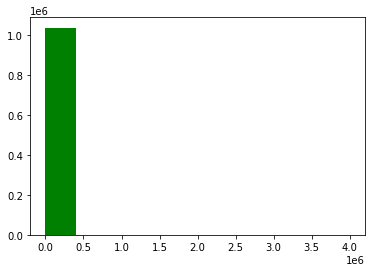

In [21]:
# let's check stationarity
train = load_data("/home/mafouz/Demand_forecasting_project/train.csv")
# 1. visual test
# plot the histogram
plt.hist(train['Order_Demand'], color = 'green')
plt.show()

In [65]:
train['Date'] = to_datetime(train['Date'])
X = train.set_index('Date').resample('D').sum().values
X

array([[   2],
       [   0],
       [   0],
       ...,
       [   0],
       [   0],
       [4000]])

the plot shows a slightly skewed distribution. the histogram doesn't show normal distribution over a period of time. so we can conclude from this plot, that the time series data is not stationary.

In [66]:
# 2. summary statistics
# to gain insights we should first split the data in two parts and check the variation of the mean and variance of the two parts.
split = round(len(X)/2)
X1, X2 = X[0:split], X[split:]
# mean of each part
mean1, mean2 = X1.mean(), X2.mean()
# variance of each part
var1, var2 = X1.var(), X2.var()
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 1814266.582498, mean2 = 2865928.269827
variance1 = 4233952479388.149414, variance2 = 4625329652124.948242


looking at the above results the mean and variance of the first part is very different from the second part. it shows another indication of non-stationary time series data.

3. Augmented Dickey-Fuller test

ADF test is a common statistical test used to test whether a given time series is stationary or not. we achieve it by defining the null and alternate hypothesis.
- null hypothesis: time series is stationary. it gives a time-dependent trend.
- alternate hypothesis: time series is non-stationary. in another term, the series doesn't depend on time.
ADF or test statistic < critical values : accept the null hypothesis. hence time series is stationary.
ADF or test statistic > critical values : failed to reject the null hypothesis. therefore the time series is non-stationary. 

In [67]:
# ADF statistic to check stationary of the time series data:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-values: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.835538
p-values: 0.053374
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure. Also,
the output above shows that the p-value is a little bit greater than the significance level of 0.05, so we fail to reject the null hypothesis. the series is not stationary and requires differencing.

Let's log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [74]:
X = log(X)
X

array([[        nan],
       [        nan],
       [        nan],
       ...,
       [        nan],
       [        nan],
       [-0.28860341]])

In [76]:
X = pd.DataFrame(X)


In [77]:
X = X.dropna(inplace = False)
X

,0
143,-0.834212
167,-0.116039
237,-0.392738
262,-1.685534
265,-0.265961
...,...
2187,-0.330171
2188,-0.167111
2189,-0.119771
2190,-0.091365


In [78]:
from numpy import log
X = X.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-values: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.081459
p-values: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value now is below the significance level, indicating that the series is stationary. 

In [79]:
# fit model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(X, order = (7,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1709
Model:                     ARMA(7, 1)   Log Likelihood                 698.126
Method:                       css-mle   S.D. of innovations              0.161
Date:                Tue, 01 Jun 2021   AIC                          -1376.253
Time:                        22:12:52   BIC                          -1321.816
Sample:                             0   HQIC                         -1356.106
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0639      0.007     -8.736      0.000      -0.078      -0.050
ar.L1.y        0.0072      0.074      0.098      0.922      -0.137       0.152
ar.L2.y       -0.0178      0.024     -0.732      0.4

In [ ]:
df[df['itwNummer'].duplicated(keep=False)]

In [ ]:
# make a new dataframe to separate the duplicated values of itwNummer
new_all= df[df['itwNummer'].duplicated(keep=False)].sort_values('itwNummer')
new_all

In [ ]:
# joining few products with the same itwNummer in the same line
new_all['product_bundle'] = new_all.groupby('itwNummer')['pvBezeichnung'].transform(lambda x: ','.join(x))
new_all